## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rnd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_study_results = mouse_metadata.merge(study_results, how="left", on="Mouse ID")

# Display the data table for preview
df_mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f'Total Mice: {len(mouse_metadata)}')

Total Mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_dupe_mice = df_mouse_study_results[df_mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint'])]

df_dupe_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_study_results.loc[df_mouse_study_results['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_c_mouse_study_results = df_mouse_study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
df_c_mouse_study_results.loc[df_c_mouse_study_results['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
df_gb_study_results_regimen = df_c_mouse_study_results.groupby('Drug Regimen')

s_tumor_volume = df_gb_study_results_regimen['Tumor Volume (mm3)']

df_tumor_summary_multiline = pd.DataFrame({
    'Mean': s_tumor_volume.mean(),
    'Median': s_tumor_volume.median(),
    'Mode': s_tumor_volume.apply(lambda x: x.mode().iloc[0]),
    'Variance': s_tumor_volume.var(),
    'Standard Deviation': s_tumor_volume.std(),
    'SEM': s_tumor_volume.sem()
})

df_tumor_summary_multiline

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,45.0,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
s_tumor_volume.agg(['mean', 'median', ('mode', lambda x:x.value_counts().index[0]), 'var', 'std', 'sem'])

,mean,median,mode,var,std,sem
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,45.0,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


## Bar and Pie Charts

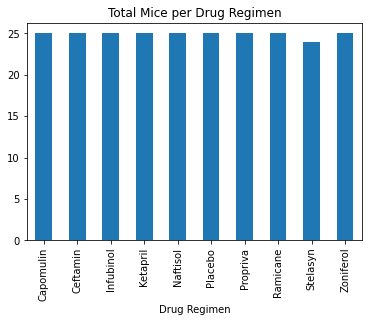

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
df_gb_study_results_regimen['Mouse ID'].nunique().plot(kind='bar', title='Total Mice per Drug Regimen')
plt.show()

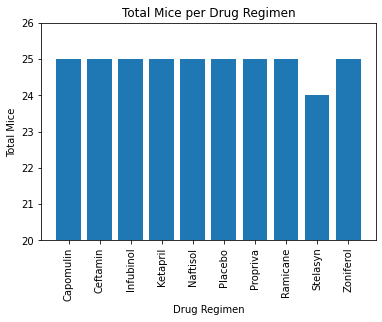

In [59]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
df_total_mice = df_gb_study_results_regimen['Mouse ID'].nunique().to_frame().reset_index()
drugs = [x for x in df_total_mice['Drug Regimen']]
total_mice = [x for x in df_total_mice['Mouse ID']]
plt.bar(drugs, total_mice)
plt.title('Total Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.xticks(rotation='vertical')
plt.ylim(20, 26)
plt.show()

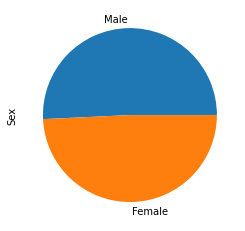

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_c_mouse_study_results['Sex'].value_counts().plot(kind='pie')

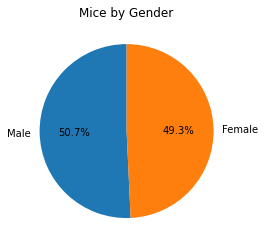

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = df_c_mouse_study_results['Sex'].value_counts().index.to_list()
sizes = df_c_mouse_study_results['Sex'].value_counts().to_list()

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Mice by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
s = df_c_mouse_study_results.loc[df_c_mouse_study_results['Drug Regimen'].isin(promising_drugs)].groupby('Mouse ID')['Timepoint'].max()
s.name = 'Max Timepoint'

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_study_results_max_timepoint = df_c_mouse_study_results.merge(s, how='inner', on='Mouse ID')

df_study_last_tumor_volume = df_study_results_max_timepoint.loc[df_study_results_max_timepoint['Timepoint'] == df_study_results_max_timepoint['Max Timepoint'], ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = [x for x in df_study_last_tumor_volume['Drug Regimen'].drop_duplicates()]

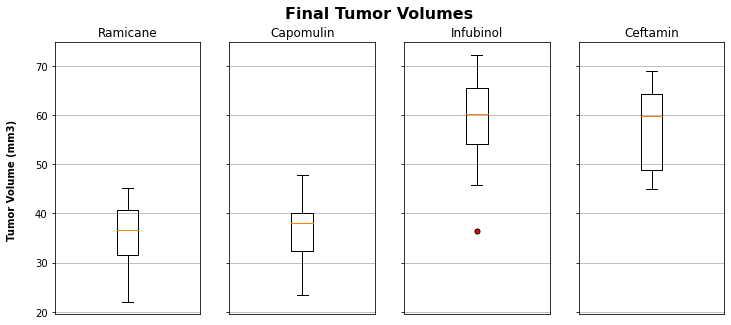

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(ncols=len(drugs), figsize=(12, 5), sharey=True)
fig.suptitle("Final Tumor Volumes", fontsize=16, fontweight="bold")
fig.text(0.07, 0.5, 'Tumor Volume (mm3)', va='center', rotation='vertical', fontweight="bold")

flierprops = dict(marker='.', markerfacecolor='red', markersize=10, linestyle='none')

for d in range(len(drugs)):
    axs[d].grid(axis='y')
    axs[d].set_title(drugs[d])
    axs[d].boxplot(df_study_last_tumor_volume.loc[df_study_last_tumor_volume['Drug Regimen'] == drugs[d]]['Tumor Volume (mm3)'], flierprops=flierprops)
    axs[d].tick_params(axis='x', bottom=False, labelbottom=False)

plt.show()  

## Line and Scatter Plots

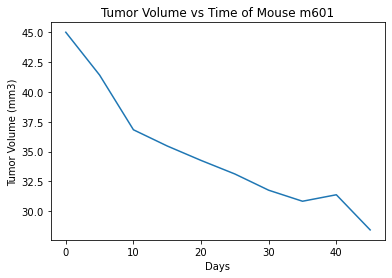

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_capomulin_results = df_c_mouse_study_results.loc[df_c_mouse_study_results['Drug Regimen'] == 'Capomulin']
mouse_id = rnd.choice(df_capomulin_results['Mouse ID'].unique())

df_capomulin_results.loc[df_capomulin_results['Mouse ID'] == mouse_id, ['Timepoint', 'Tumor Volume (mm3)']].plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', title=f'Tumor Volume vs Time of Mouse {mouse_id}', legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Days")
plt.show()


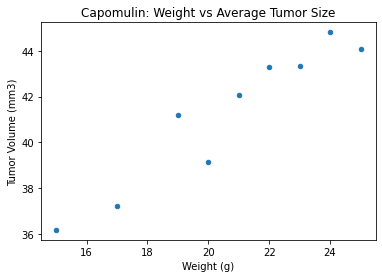

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_average_tumor_vs_weight = df_capomulin_results \
    .groupby('Weight (g)')['Tumor Volume (mm3)'] \
    .mean() \
    .to_frame() \
    .reset_index()
    
df_average_tumor_vs_weight.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter', title="Capomulin: Weight vs Average Tumor Size")

plt.show()

## Correlation and Regression

y = 0.89x + 22.76


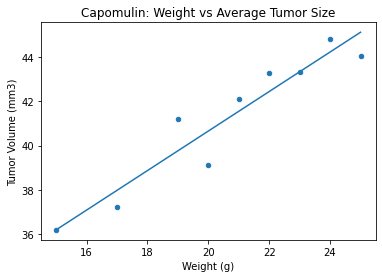

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(df_average_tumor_vs_weight['Weight (g)'], df_average_tumor_vs_weight['Tumor Volume (mm3)'])
regress_values = df_average_tumor_vs_weight['Weight (g)'] * slope + intercept
print("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

df_average_tumor_vs_weight.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter', title="Capomulin: Weight vs Average Tumor Size")
plt.plot(df_average_tumor_vs_weight['Weight (g)'], regress_values)
plt.show()

